In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.rcParams['font.size'] = 8
#matplotlib.rcParams['figure.figsize'] = (5, 5)

import seaborn as sns #plot figures
from IPython.core.pylabtools import figsize

# Scipy helper functions
import scipy #get statistics percentile
from scipy.stats import percentileofscore
from scipy import stats

In [2]:
#load data
tweets_total = pd.read_csv('tweetstotal_clean.csv',encoding='utf-8')

In [4]:
tweets_total.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet
0,0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha...",2017-12-12,13:10:53+00:00,2017,rt goproudout singapore time change clos...
1,1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds...",2017-12-12,13:00:32+00:00,2017,singapore time change closed minds towards...
2,2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...,2017-11-29,16:48:02+00:00,2017,singapore gay circle way many metoo stories...
3,3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...,2017-11-04,13:32:18+00:00,2017,disclaimer know nothing abt johnten vibes ...
4,4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB,2017-10-08,08:46:03+00:00,2017,


In [5]:
tweets_total['clean_Tweet'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10197     True
10198     True
10199     True
10200     True
10201     True
Name: clean_Tweet, Length: 10202, dtype: bool

In [6]:
tweets_total = tweets_total.drop_duplicates(subset=['clean_Tweet'])

In [7]:
tweets_total[tweets_total.duplicated()]

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet


In [8]:
tweets_total.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet
0,0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha...",2017-12-12,13:10:53+00:00,2017,rt goproudout singapore time change clos...
1,1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds...",2017-12-12,13:00:32+00:00,2017,singapore time change closed minds towards...
2,2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...,2017-11-29,16:48:02+00:00,2017,singapore gay circle way many metoo stories...
3,3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...,2017-11-04,13:32:18+00:00,2017,disclaimer know nothing abt johnten vibes ...
4,4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB,2017-10-08,08:46:03+00:00,2017,
...,...,...,...,...,...,...,...,...
10178,10881,2022-02-28 13:52:01+00:00,156852277,RT @kixes: The conclusion from #Singapore’s Co...,2022-02-28,13:52:01+00:00,2022,rt kixes conclusion singapore court appe...
10179,10882,2022-02-28 13:30:09+00:00,967149250193838081,A panel of judges on the Court of Appeal on Mo...,2022-02-28,13:30:09+00:00,2022,panel judges court appeal monday febr...
10181,10885,2022-02-28 12:57:34+00:00,1493937818065719297,Court of Appeal rules Section 377A stays but c...,2022-02-28,12:57:34+00:00,2022,court appeal rules section 377a stays cannot...
10186,10890,2022-02-28 12:27:22+00:00,110019610,RT @Ready4Repeal: The Court of Appeal has dism...,2022-02-28,12:27:22+00:00,2022,rt ready4repeal court appeal dismissed 3...


### text preprocessing

In [9]:
#!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.2 MB/s eta 0:00:00


In [71]:
#assign sentiment to the tweets
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    
analyzer = SentimentIntensityAnalyzer()

def senti(tweet):
    return analyzer.polarity_scores(tweet)['compound']

#tweets_total['compound']=tweets_total.agg({'clean_Tweet':[senti]})    

tweets_total['compound']=tweets_total['clean_Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [46]:
tweets_total.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet,compound
0,0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha...",2017-12-12,13:10:53+00:00,2017,rt goproudout singapore time change clos...,0.0000
1,1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds...",2017-12-12,13:00:32+00:00,2017,singapore time change closed minds towards...,0.4767
2,2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...,2017-11-29,16:48:02+00:00,2017,singapore gay circle way many metoo stories...,-0.3182
3,3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...,2017-11-04,13:32:18+00:00,2017,disclaimer know nothing abt johnten vibes ...,0.3400
4,4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB,2017-10-08,08:46:03+00:00,2017,,0.0000


In [72]:
nega = tweets_total[tweets_total['compound']<0]
nega.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet,compound
2,2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...,2017-11-29,16:48:02+00:00,2017,singapore gay circle way many metoo stories...,-0.3182
8,8,2017-08-17 18:14:40+00:00,801345388619956224,@roxsantos @delavinkisses On top is the origin...,2017-08-17,18:14:40+00:00,2017,roxsantos delavinkisses top original pict...,-0.4019
45,45,2017-07-02 10:00:22+00:00,828888961707888641,"Under Singapore law, sex between men is punish...",2017-07-02,10:00:22+00:00,2017,singapore law sex men punishable two ye...,-0.4404
48,48,2017-07-02 04:56:14+00:00,894917894,Is it possible to be on the right side of #his...,2017-07-02,04:56:14+00:00,2017,possible right side history wrong sid...,-0.2500
52,52,2017-07-02 02:59:06+00:00,365886581,昨日是否也出席了粉红点集会？近2万人在昨日出席了本地声援同性恋、双性恋和跨性别者权益的粉红点...,2017-07-02,02:59:06+00:00,2017,Zuo Ri Shi Fou Ye Chu Xi Liao Fen Hong Dian Ji...,-0.5574
...,...,...,...,...,...,...,...,...,...
10195,10899,2022-02-28 12:00:53+00:00,232336477,RT @PinkNews: Singapore court refuses to overt...,2022-02-28,12:00:53+00:00,2022,rt pinknews singapore court refuses overtur...,-0.8074
10196,10900,2022-02-28 12:00:36+00:00,952944788,RT @PinkNews: Singapore court refuses to overt...,2022-02-28,12:00:36+00:00,2022,rt pinknews singapore court refuses overtur...,-0.8074
10197,10901,2022-02-28 11:59:03+00:00,27987687,Singapore court refuses to overturn archaic ga...,2022-02-28,11:59:03+00:00,2022,singapore court refuses overturn archaic gay ...,-0.8074
10199,10904,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...,2022-02-28,11:32:08+00:00,2022,rt afa singapore afa singapore deeply disap...,-0.5256


In [73]:
neu = tweets_total[tweets_total['compound']==0]
neu.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet,compound
0,0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha...",2017-12-12,13:10:53+00:00,2017,rt goproudout singapore time change clos...,0.0
4,4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB,2017-10-08,08:46:03+00:00,2017,,0.0
5,5,2017-10-01 00:40:38+00:00,27361172,Sometimes I wonder about those people who are ...,2017-10-01,00:40:38+00:00,2017,sometimes wonder people quick call pin...,0.0
7,7,2017-08-26 19:42:25+00:00,801345388619956224,@X_tine95 Hahahaha baka pati yong pinkdot ng L...,2017-08-26,19:42:25+00:00,2017,x tine95 hahahaha baka pati yong pinkdot ng l...,0.0
9,9,2017-08-15 19:03:52+00:00,806356134944763905,RT @kissesdonut: Dito kayo sa Singapore at pun...,2017-08-15,19:03:52+00:00,2017,rt kissesdonut dito kayo sa singapore punta...,0.0
...,...,...,...,...,...,...,...,...,...
10145,10846,2022-02-28 21:45:41+00:00,804684840,RT @HumanDignityT: BREAKING: Partial victory a...,2022-02-28,21:45:41+00:00,2022,rt humandignityt breaking partial victory ...,0.0
10148,10849,2022-02-28 20:41:16+00:00,982117550,RT @HumanDignityT: The #Singapore Court of App...,2022-02-28,20:41:16+00:00,2022,rt humandignityt singapore court appeal ...,0.0
10184,10888,2022-02-28 12:39:39+00:00,165247598,RT @HumanDignityT: The #Singapore Court of App...,2022-02-28,12:39:39+00:00,2022,rt humandignityt singapore court appeal ...,0.0
10185,10889,2022-02-28 12:38:58+00:00,3158178364,RT @HumanDignityT: The #Singapore Court of App...,2022-02-28,12:38:58+00:00,2022,rt humandignityt singapore court appeal ...,0.0


In [75]:
posi = tweets_total[tweets_total['compound']>0]
posi.head(5)

,Unnamed: 0,Time,Author ID,Tweet,Date,Time_1,Year,clean_Tweet,compound
1,1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds...",2017-12-12,13:00:32+00:00,2017,singapore time change closed minds towards...,0.4767
3,3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...,2017-11-04,13:32:18+00:00,2017,disclaimer know nothing abt johnten vibes ...,0.3400
6,6,2017-09-10 03:29:17+00:00,17440806,My favourite image from #pinkdot #singapore #l...,2017-09-10,03:29:17+00:00,2017,favourite image pinkdot singapore leica c...,0.6369
11,11,2017-08-15 17:03:23+00:00,850581523283812353,RT @PrincilloVine: Tens of thousands of Singap...,2017-08-15,17:03:23+00:00,2017,rt princillovine tens thousands singaporea...,0.3400
12,12,2017-08-15 16:15:53+00:00,837814511667064832,RT @PrincilloVine: Tens of thousands of Singap...,2017-08-15,16:15:53+00:00,2017,rt princillovine tens thousands singaporea...,0.3400
...,...,...,...,...,...,...,...,...,...
10182,10886,2022-02-28 12:56:33+00:00,459090158,RT @NumanAfifi: Singapore’s Court of Appeal ru...,2022-02-28,12:56:33+00:00,2022,rt numanafifi singapore court appeal rules ...,0.3875
10186,10890,2022-02-28 12:27:22+00:00,110019610,RT @Ready4Repeal: The Court of Appeal has dism...,2022-02-28,12:27:22+00:00,2022,rt ready4repeal court appeal dismissed 3...,0.0772
10188,10892,2022-02-28 12:25:12+00:00,335541370,RT @Ready4Repeal: The Court of Appeal has dism...,2022-02-28,12:25:12+00:00,2022,rt ready4repeal court appeal dismissed 3...,0.0772
10189,10893,2022-02-28 12:21:41+00:00,27212654,RT @deweysim: NEW: Singapore's Court of Appeal...,2022-02-28,12:21:41+00:00,2022,rt deweysim new singapore court appeal di...,0.0772


In [11]:
import texthero as hero

singapore         3177
rt                1970
gay               1571
cut               1201
kiss               864
wars               818
star               817
lgbt               802
sex                776
lesbian            676
court              654
china              474
scene              460
showings           425
clear              424
catcontentonly     422
hav                422
man                399
377a               383
ban                379
Name: clean_Tweet, dtype: int64


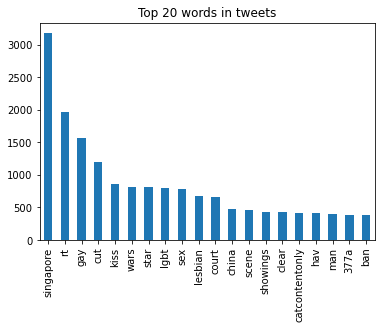

In [12]:
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(nega.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(top_20)
top_20.plot.bar(rot=90, title="Top 20 words in tweets");
plt.show();

# Plot3 for negative, positive, and neutral sentiments.

## Negative

In [74]:
#Visualization
import nltk
from nltk import*
import matplotlib.pyplot as plt
import seaborn as sns
import stylecloud
from palettable.cartocolors.sequential import RedOr_7
from IPython.display import Image

#def viz(data):
text_list = list(nega.clean_Tweet)
text=""
for i in text_list:
    text+=i
    text+=' '
#corpus = preprocess(text)

#Word Cloud visualization 
#corpus_text = " ".join(corpus)
f = open("corpus.txt",'w',encoding='utf-8')   
#f.write(corpus_text)  
f.write(text)
f.close() 

stylecloud.gen_stylecloud(file_path = "corpus.txt",
                        output_name = 'result.png',
                        size = 750,
                        icon_name = "fas fa-frown", 
                        palette = 'cartocolors.sequential.RedOr_7',
                        background_color='white',
                        gradient='horizontal')


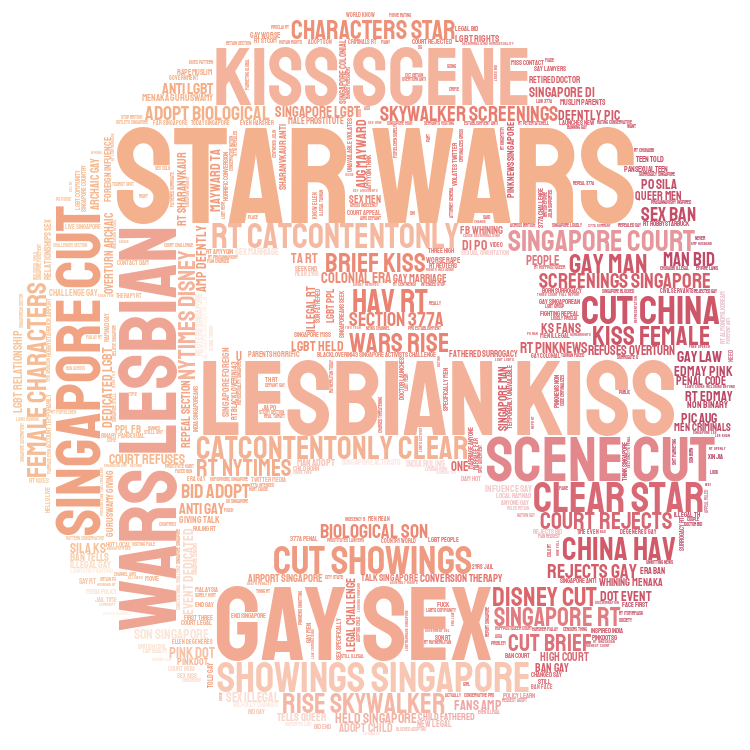

In [76]:
Image(filename = 'result.png')

## Positive

In [80]:
#Visualization
import nltk
from nltk import*
import matplotlib.pyplot as plt
import seaborn as sns
import stylecloud
from palettable.cartocolors.sequential import TealGrn_6
from IPython.display import Image

#def viz(data):
text_list = list(posi.clean_Tweet)
text=""
for i in text_list:
    text+=i
    text+=' '
#corpus = preprocess(text)

#Word Cloud visualization 
#corpus_text = " ".join(corpus)
f = open("corpus.txt",'w',encoding='utf-8')   
#f.write(corpus_text)  
f.write(text)
f.close() 

stylecloud.gen_stylecloud(file_path = "corpus.txt",
                        output_name = 'result_1.png',
                        size = 750,
                        icon_name = "fas fa-grin", 
                        palette = 'cartocolors.sequential.TealGrn_6',
                        background_color='white',
                        gradient='horizontal')

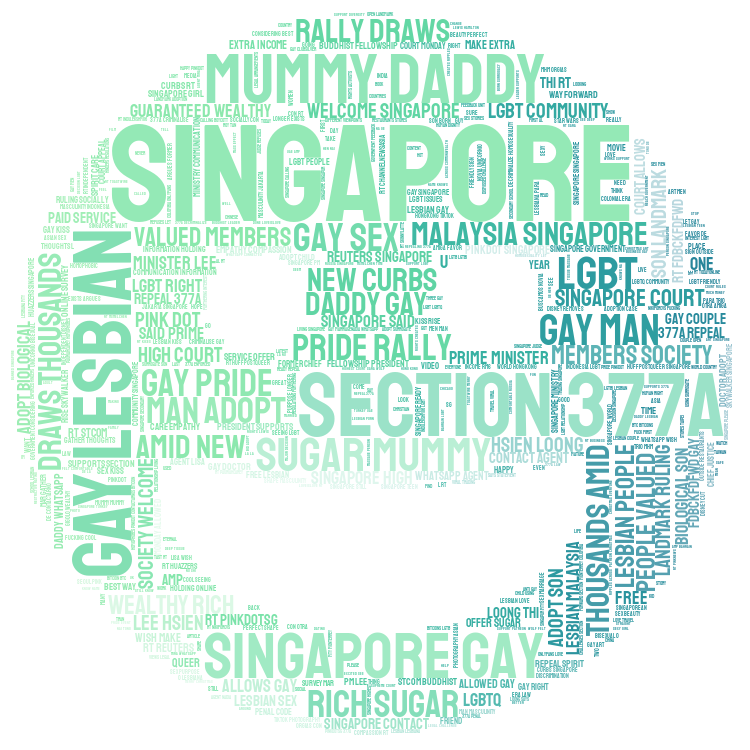

In [81]:
Image(filename = 'result_1.png')

## Neutral

In [82]:
#Visualization
import nltk
from nltk import*
import matplotlib.pyplot as plt
import seaborn as sns
import stylecloud
from palettable.cartocolors.sequential import Teal_4
from IPython.display import Image

#def viz(data):
text_list = list(neu.clean_Tweet)
text=""
for i in text_list:
    text+=i
    text+=' '
#corpus = preprocess(text)

#Word Cloud visualization 
#corpus_text = " ".join(corpus)
f = open("corpus.txt",'w',encoding='utf-8')   
#f.write(corpus_text)  
f.write(text)
f.close() 

stylecloud.gen_stylecloud(file_path = "corpus.txt",
                        output_name = 'result_2.png',
                        size = 750,
                        icon_name = "fas fa-grimace", 
                        palette = 'cartocolors.sequential.Teal_4',
                        background_color='white',
                        gradient='horizontal')

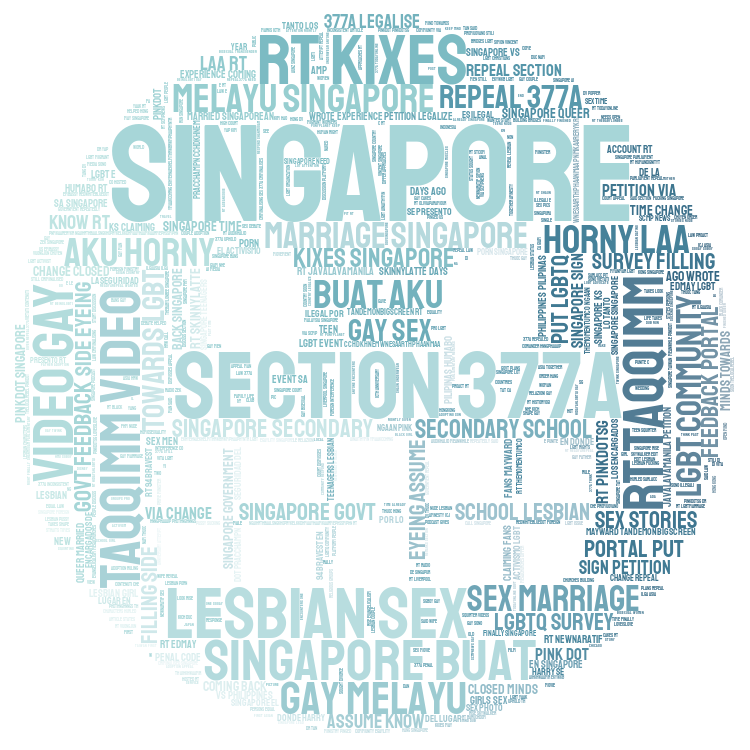

In [84]:
Image(filename = 'result_2.png')